In [1]:
import gym 
import numpy as np
from custom_envs.gridworlds import WindyGridworldEnv, SimpleGridworldEnv

from function_approximators.function_approximators import NeuralNetwork, LinearModel, DecisionTree, RandomForest, ExtraTrees, GradientBoostingTrees, SupportVectorRegressor

from utils.train_utils import train
from utils.plot_utils import plot_returns

from agents.agents import DQNAgent, LinearAgent, NonParametricAgent


In [2]:
function_approximators = [NeuralNetwork, LinearModel, DecisionTree, RandomForest, ExtraTrees, GradientBoostingTrees, SupportVectorRegressor]
agents = [DQNAgent, LinearAgent, *[NonParametricAgent]*5]

RENDER = False
env = gym.make("CartPole-v1")
# env = gym.make("Acrobot-v1")
# env = gym.make("MountainCar-v0")
# env = WindyGridworldEnv()
# env = gym.make("LunarLander-v2")
# env = SimpleGridworldEnv()

In [3]:
# DQN Config
CONFIG_DQN = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 10,
    "learning_rate": 0.00075,
    "hidden_size": (32,32),
    "target_update_freq": 200,
    "batch_size": 32,
    "gamma": 0.99,
    "buffer_capacity": int(1e7),
    "plot_loss": False,
    "epsilon": 1,
    "max_deduct": 0.97,
    "decay": 0.2,
    "lr_step_size": 1000,
    "lr_gamma": 0.95,
    "max_steps": 200,
    "non_param": False,
}

# Linear Config
CONFIG_LINEAR = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 10,
    "learning_rate": 0.02,
    "target_update_freq": 50,
    "batch_size": 32,
    "gamma": 0.99,
    "buffer_capacity": int(1e7),
    "plot_loss": False,
    "epsilon": 1,
    "max_steps": 200,
    "poly_degree": 2,
    "max_deduct": 0.97,
    "decay": 0.5,
    "lr_step_size": 1000,
    "lr_gamma": 0.99,
    "non_param": False,
}

# Decision Tree Config
CONFIG_DT = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 10,
    "model_save_freq": 1000,
    "model_save_capacity": 20,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e7),
    "epsilon": 1,
    "max_deduct": 0.97,
    "decay": 0.5,
    "max_steps": 200,
    "non_param": True,
    "model_params": {"max_depth": 7, "min_samples_split": 10, "min_samples_leaf": 5},
}

# Random Forest Config
CONFIG_RF = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 10,
    "model_save_freq": 1000,
    "model_save_capacity": 20,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e5),
    "epsilon": 1,
    "max_deduct": 0.95,
    "decay": 0.3,
    "max_steps": 200,
    "non_param": True,
    "model_params": {"n_estimators": 10,"max_depth": 10, "min_samples_split": 10, "min_samples_leaf": 10},
}

# Extra Trees Config
CONFIG_ET = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 10,
    "model_save_freq": 1000,
    "model_save_capacity": 20,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e5),
    "epsilon": 1,
    "max_deduct": 0.95,
    "decay": 0.3,
    "max_steps": 200,
    "non_param": True,
    "model_params": {"n_estimators": 10,"max_depth": 10, "min_samples_split": 10, "min_samples_leaf": 10},
}

# Gradient Boosting Trees Config
CONFIG_RF = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 10,
    "model_save_freq": 1000,
    "model_save_capacity": 20,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e5),
    "epsilon": 1,
    "max_deduct": 0.95,
    "decay": 0.3,
    "max_steps": 200,
    "non_param": True,
    "model_params": {"loss":"ls","learning_rate":0.1, "n_estimators": 10,"max_depth": 10, "min_samples_split": 10, "min_samples_leaf": 10},
}

# Support Vector Regressor Config
CONFIG_SVR = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 3,
    "model_save_freq": 1000,
    "model_save_capacity": 10,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e5),
    "epsilon": 1,
    "max_deduct": 0.95,
    "decay": 0.3,
    "max_steps": 200,
    "non_param": True,
    "model_params": {"kernel":"rbf", "degree": 2, "C": 1},
}


In [18]:
# Decision Tree Config
CONFIG_DT = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 10,
    "model_save_freq": 500,
    "model_save_capacity": 40,
    "update_freq": 10,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e6),
    "epsilon": 1,
    "max_deduct": 0.95,
    "decay": 0.5,
    "max_steps": 200,
    "non_param": True,
    "export_tree": True,
    "model_params": {"criterion":"friedman_mse","max_depth": 10, "min_samples_split": 20, "min_samples_leaf": 5},
}

returns = []
n_seeds=10

j=2
for i in range(n_seeds):
    print(f"\n Run: {i+1} \n")
    r, _, dt = train(env, 
            CONFIG_DT, 
            fa=function_approximators[j], 
            agent = agents[j], 
            render=RENDER)
    env.close()
    returns.append(r)

  4%|▎         | 705/20000 [00:00<00:02, 6652.88it/s]
 Run: 1 

  7%|▋         | 1382/20000 [00:00<00:14, 1324.07it/s]Evaluation at timestep 1043 returned a mean returns of 169.7
Epsilon = 0.90614
 11%|█▏        | 2287/20000 [00:02<00:26, 670.05it/s] Evaluation at timestep 2014 returned a mean returns of 157.8
Epsilon = 0.81418
 16%|█▌        | 3163/20000 [00:03<00:41, 402.63it/s] Evaluation at timestep 3004 returned a mean returns of 167.40000000000003
Epsilon = 0.716995
 21%|██        | 4154/20000 [00:06<01:07, 235.46it/s]Evaluation at timestep 4042 returned a mean returns of 186.20000000000002
Epsilon = 0.620285
 26%|██▌       | 5116/20000 [00:09<00:22, 652.37it/s]Evaluation at timestep 5116 returned a mean returns of 185.29999999999998
Epsilon = 0.53298
 31%|███       | 6246/20000 [00:13<01:35, 144.07it/s]Evaluation at timestep 6127 returned a mean returns of 187.39999999999998
Epsilon = 0.4369350000000001
 35%|███▌      | 7037/20000 [00:18<00:33, 389.55it/s]Evaluation at timestep 

KeyboardInterrupt: 

199.95
0.1024695076595971


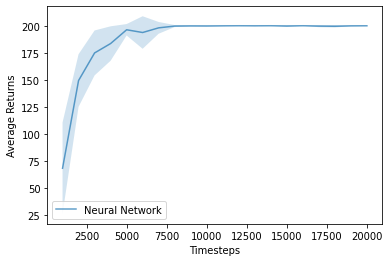

In [25]:
mean = [np.mean(returns, axis=0)]
std = [np.std(returns, axis=0)]
print(mean[-1])
print(std[-1])


In [24]:
with open(f'cartpole_DT.csv', 'ab') as f:
    np.savetxt(f, mean, delimiter=',')
    np.savetxt(f, std, delimiter=',')
        

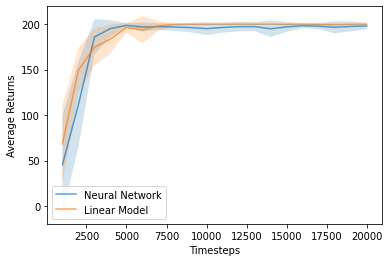

In [36]:
legends = ["Neural Network","Linear Model", "Decision Tree"]
means = []
stds = []
for i in range(2):
    a = np.genfromtxt(f'cartpole_{legends[i]}.csv', dtype= None)
    means.append(a[0:20])
    stds.append(a[20:41])

plot_returns(values=means, stds=stds, xlabel="Timesteps", ylabel="Average Returns", legend_names=legends, eval_freq=1000)



In [35]:
stds

[array([54.14, 46.98, 19.53,  9.15,  2.4 ,  5.07,  3.7 ,  4.22,  5.21,
         7.15,  5.7 ,  5.26,  5.09,  9.18,  5.52,  2.63,  3.43,  6.63,
         5.48]),
 array([42.20569274, 24.28900163, 20.75761065, 15.91403469,  5.27656138,
        15.03031603,  5.43051563,  0.93      ,  0.51      ,  0.51536395,
         0.21908902,  0.        ,  0.23853721,  0.        ,  0.81      ,
         0.        ,  1.02      ,  1.1282287 ,  0.36      ])]

In [5]:
from sklearn import tree

features = ["Cart Position", "Cart Velocity", "Pole Angle", "Pole Angular Velocity", "Action: Left", "Action: Right"]
_ = tree.plot_tree(dt, feature_names=features, filled=True)

NotFittedError: This DecisionTree instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [7]:
tree.plot_tree(dt)

NotFittedError: This DecisionTree instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.